direct debit payment - thank you 
autocashbacks  reward credit 
direct debit payment - thank you 
direct debit payment - thank you 
direct debit payment - thank you 
direct debit payment - thank you 
direct debit payment - thank you 
direct debit payment - thank you 
direct debit payment - thank you 
direct debit payment - thank you 
direct debit payment - thank you 
direct debit payment - thank you 
direct debit payment - thank you 
direct debit payment - thank you 


<AxesSubplot: xlabel='TransactionDate'>

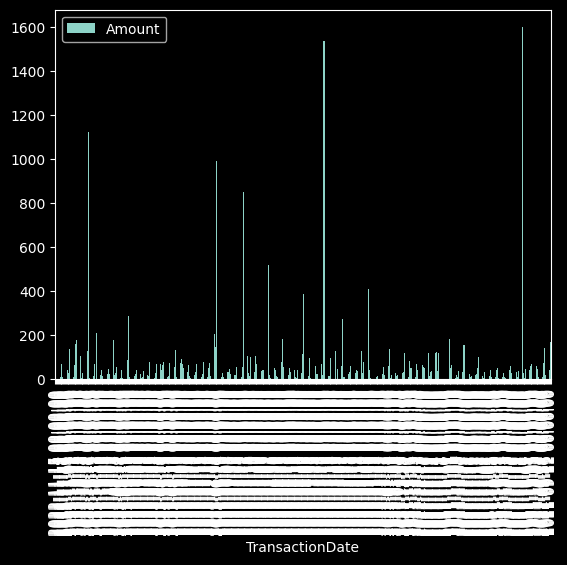

In [33]:
# Import Data 
import pandas as pd

df = pd.read_csv('/Users/luammiller/Desktop/Code/spending_analyser/anz_transactions.csv')
df['Details'] = df['Details'].str.lower()
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], dayfirst=True)
df.head()

for i in range(df.shape[0]):
    if 'thank you' in df['Details'][i] or 'reward' in df['Details'][i]:
        print(df['Details'][i])
        df = df.drop(i, axis=0)

import matplotlib
df.plot.bar(x='TransactionDate',y='Amount',rot=90)

Transction History 

<BarContainer object of 570 artists>

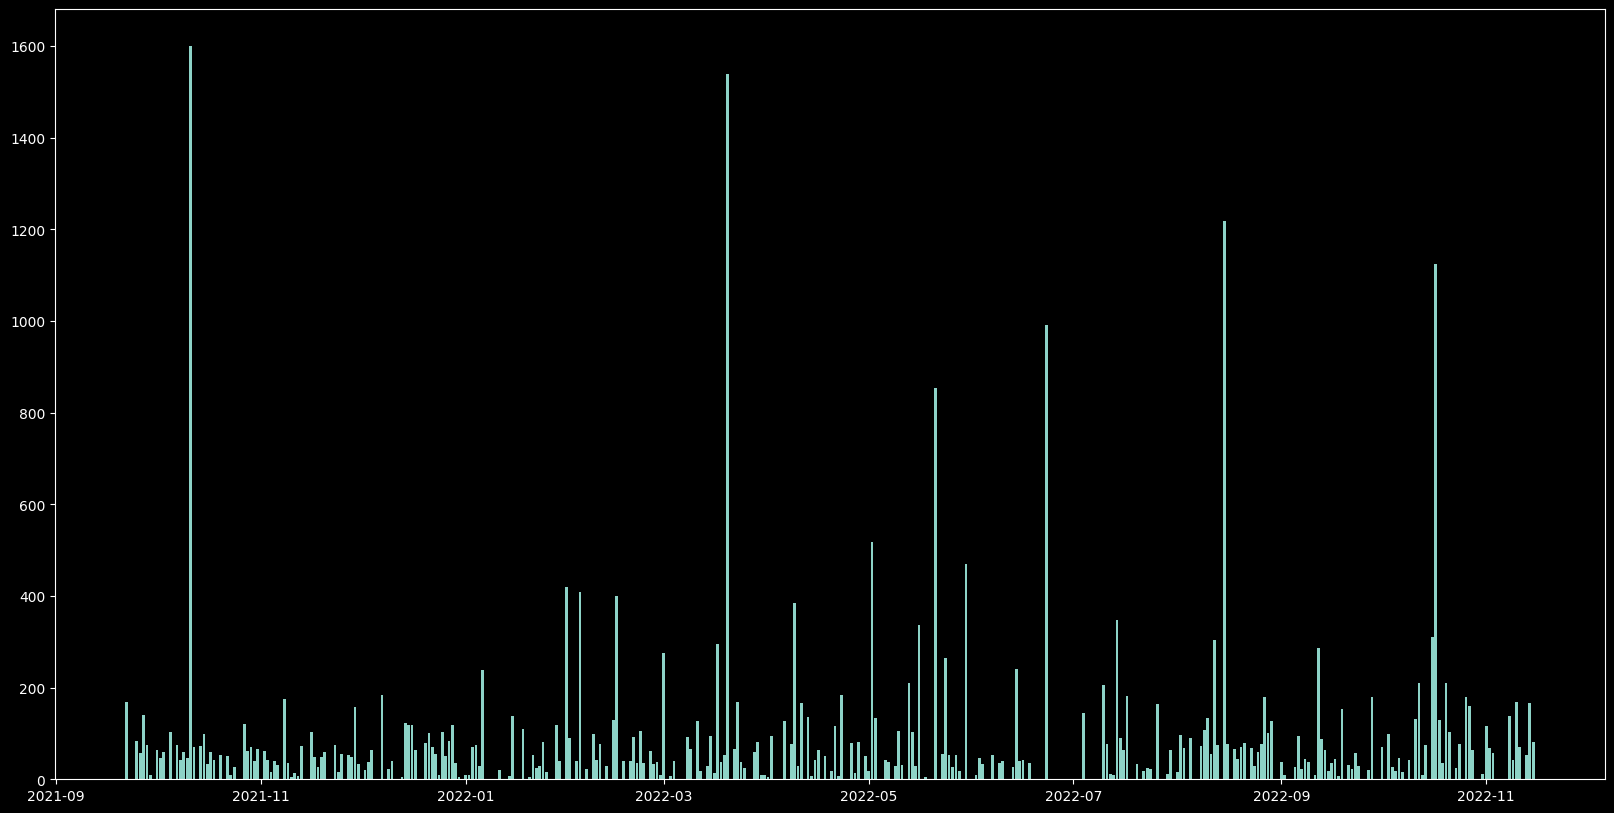

In [38]:
from matplotlib import pyplot as plt
plt.style.use("dark_background")
plt.figure(figsize=(20,10))
plt.bar(df['TransactionDate'],df['Amount'])


In [36]:
df['TransactionDate'].min()

mask = df['TransactionDate'].values == df['TransactionDate'].min()
df_new = df.loc[mask]
print(df_new)



     Amount                                   Details TransactionDate
581    9.45  bunnings - 9515        dunedin       nz       2021-09-22
582   42.95  bunnings - 9515        dunedin       nz       2021-09-22
583  167.90  sp * scapegrace        auckland      nz       2021-09-22


Total Monthly Spend

/var/folders/5l/_65g1ph90055rsmt1zn5ckqm0000gn/T/ipykernel_17689/3837470599.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ms_df = ms_df.resample('M').sum()


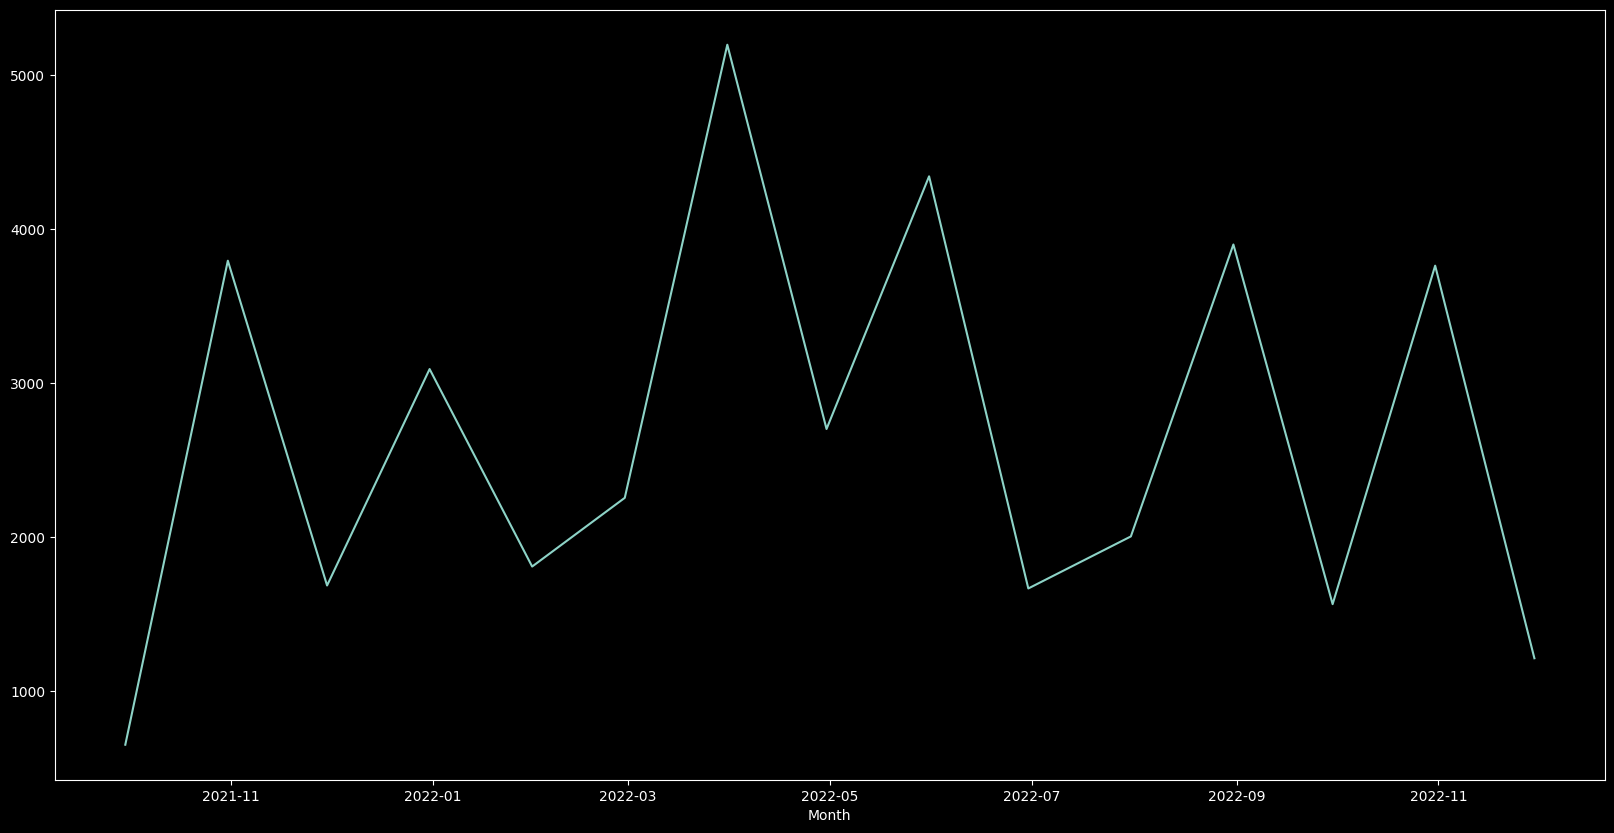

In [75]:
ms_df = df.set_index('TransactionDate')
ms_df = ms_df.resample('M').sum()
plt.figure(figsize=(20,10))
plt.xlabel(xlabel = 'Month',rotation='horizontal')
plt.plot(ms_df.index, ms_df['Amount'])

Average Transaction Amount Per Month 

/var/folders/5l/_65g1ph90055rsmt1zn5ckqm0000gn/T/ipykernel_17689/1737230455.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mms_df = ms_df.resample('M').mean()


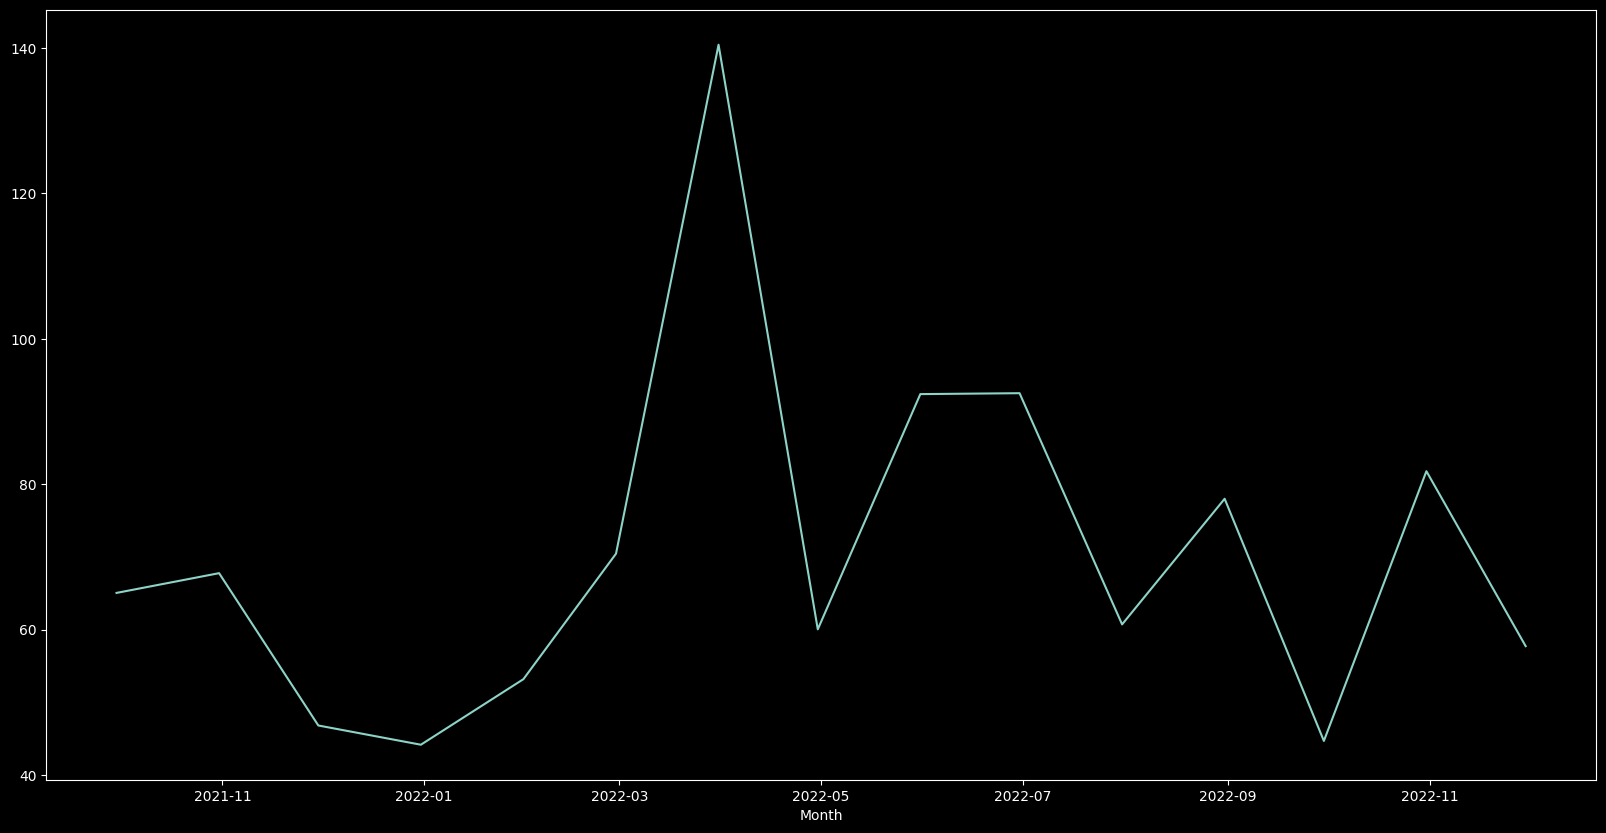

In [131]:
ms_df = df.set_index('TransactionDate')
mms_df = ms_df.resample('M').mean()
plt.figure(figsize=(20,10))
plt.xlabel(xlabel = 'Month',rotation='horizontal')
plt.plot(mms_df.index, mms_df['Amount'])

In [92]:
mms_df.max()

ms_mask = mms_df['Amount'].values == mms_df['Amount'].max()
df_new = mms_df.loc[ms_mask]
print(df_new)

                     Amount
TransactionDate            
2022-03-31       140.460541


Spend Per Category 

In [140]:
#Find most common transaction types
print(df['Details'].value_counts())



countdown online       auckland      nz     58
new world centre city  dunedin       nz     55
countdown dunedin ctr  dunedin       nz     28
pak n save dunedin     sth dunedin   nz     21
apple.com/bill         sydney        au     18
                                            ..
henrys queenstown      queenstown    nz      1
npd andy bay           dunedin       nz      1
duotrope               httpsduotrope nm      1
uber *eats help.uber.c amsterdam     nz      1
bike house sport       dunedin       nz      1
Name: Details, Length: 222, dtype: int64


Grocery Spend

In [122]:
#Make a new dataframe containg category specific transactons
groceries = []
grocery_keywords = ['countdown','new word','pak','binn in','four square']
for keyword in grocery_keywords:
    for i in df['Details']:
        if keyword in i: 
            groceries.append(i)

/var/folders/5l/_65g1ph90055rsmt1zn5ckqm0000gn/T/ipykernel_17689/3015760623.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gmms_df = gms_df.resample('M').mean()


<BarContainer object of 15 artists>

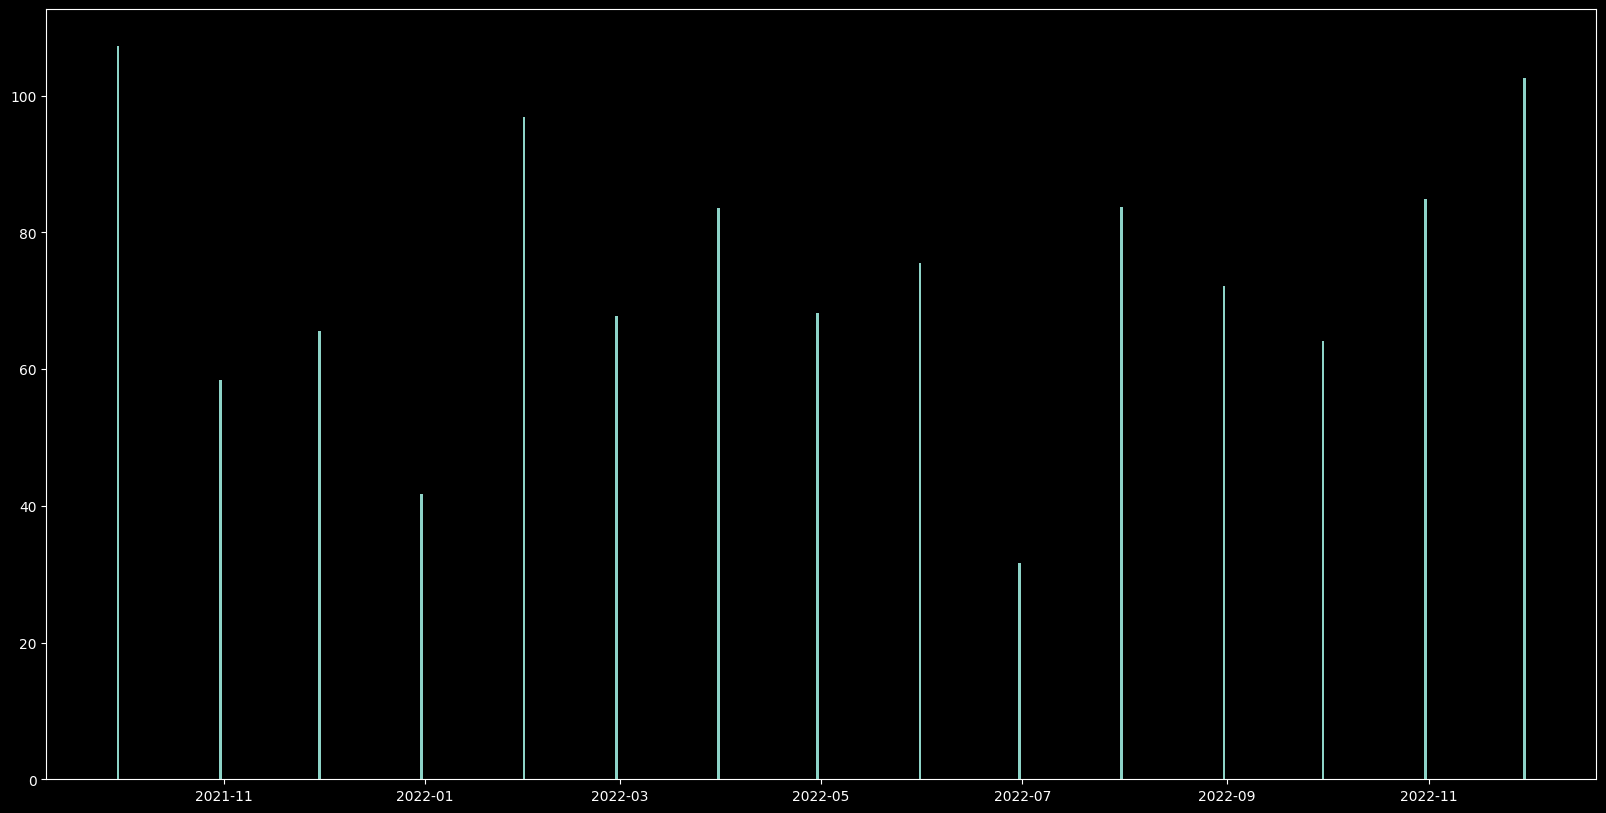

In [132]:
g_df = df[(df['Details'].isin(groceries))]
grocery_total = g_df['Amount'].sum()
gms_df = g_df.set_index('TransactionDate')
gmms_df = gms_df.resample('M').mean()
plt.figure(figsize=(20,10))
plt.bar(gmms_df.index,gmms_df['Amount'] )


House Spend 

/var/folders/5l/_65g1ph90055rsmt1zn5ckqm0000gn/T/ipykernel_17689/3523507090.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_mean_monthly_df = new_monthly_df.resample('M').mean()


4254.03


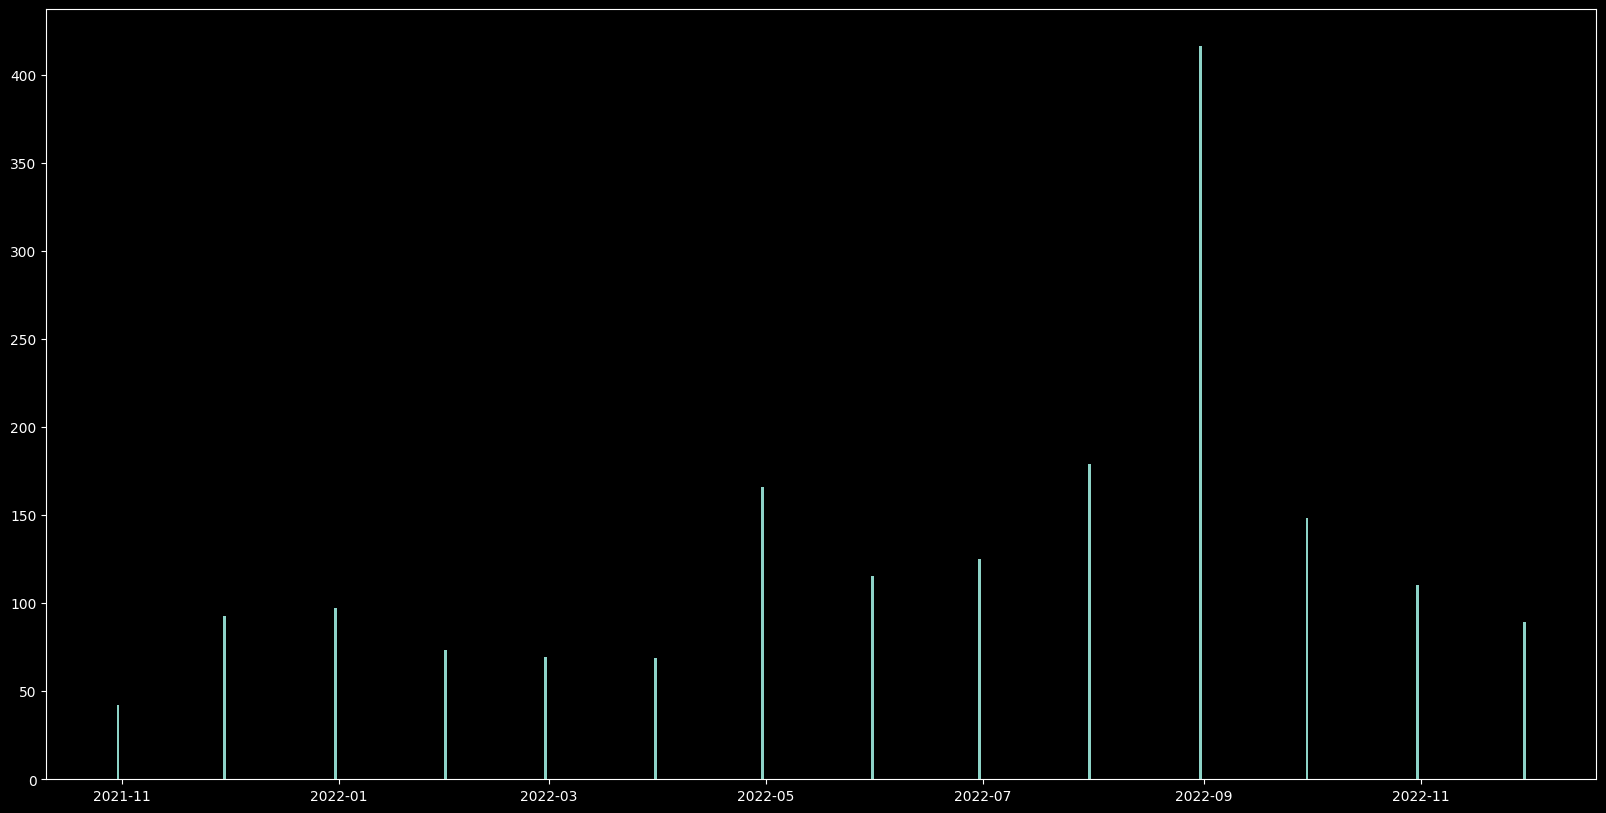

In [144]:
def category_analyser(key_list):
    #Find transactions for category
    transaction_list = []
    for keyword in key_list:
        for i in df['Details']:
            if keyword in i: 
                transaction_list.append(i)
    
    #Create category dataframe
    new_df = df[(df['Details'].isin(transaction_list))]
    category_total = new_df['Amount'].sum()
    new_monthly_df = new_df.set_index('TransactionDate')
    new_mean_monthly_df = new_monthly_df.resample('M').mean()
    plt.figure(figsize=(20,10))
    plt.bar(new_mean_monthly_df.index,new_mean_monthly_df['Amount'])

    return new_df, category_total

utilities_df, utilites_total = category_analyser(['energy','degrees','DCC','rates','insurance'])
print(utilites_total)

Vehicle Spend

/var/folders/5l/_65g1ph90055rsmt1zn5ckqm0000gn/T/ipykernel_17689/3523507090.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_mean_monthly_df = new_monthly_df.resample('M').mean()


1154.42


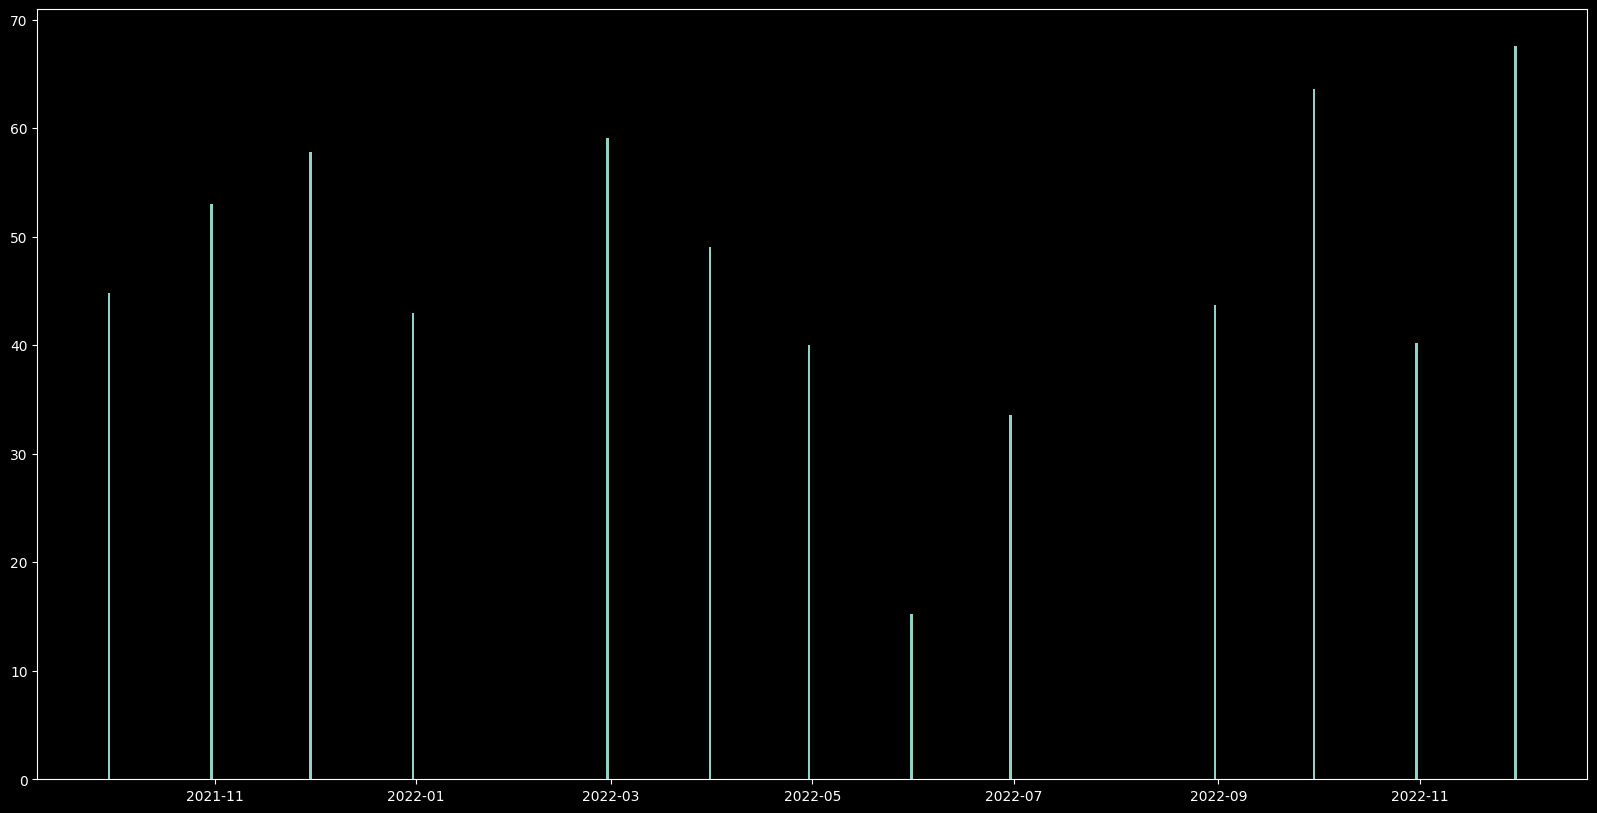

In [146]:
gas_df, gas_total = category_analyser(['npd','bp','petrol','service station'])
print(gas_total)

Category Spend in relation to each other 

([<matplotlib.patches.Wedge at 0x1305e6ad0>,
 [Text(0.6243780551249546, 0.9056224623309536, 'house'),
  Text(-0.6445412306645397, 0.8913846543291178, 'gas'),
  Text(-0.36801889000666316, -1.036610870383995, 'grocery')])

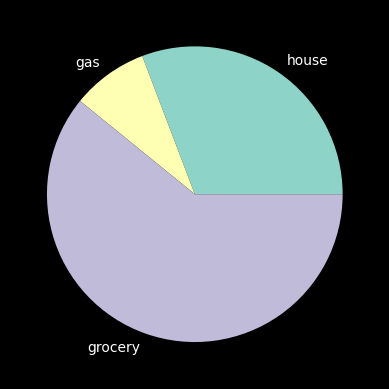

In [162]:
data = [utilites_total, gas_total, grocery_total]
labels= ['house','gas','grocery']
plt.pie(x=data,data=data, labels = labels)